The FAOSTAT Temperature Change domain disseminates statistics of mean surface temperature change by country, with annual updates. The current dissemination covers the period 1961–2019. Statistics are available for monthly, seasonal and annual mean temperature anomalies, i.e., temperature change with respect to a baseline climatology, corresponding to the period 1951–1980. The standard deviation of the temperature change of the baseline methodology is also available. Data are based on the publicly available GISTEMP data, the Global Surface Temperature Change data distributed by the National Aeronautics and Space Administration Goddard Institute for Space Studies (NASA-GISS). Show Less

Food and Agriculture Organization of the United Nations (FAO)

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from google.colab import auth
auth.authenticate_user()
import gspread
from oauth2client.client import GoogleCredentials
gc = gspread.authorize(GoogleCredentials.get_application_default())

In [0]:
FAOstat_cont = gc.open_by_url('https://docs.google.com/spreadsheets/d/1bpQmOg6SemLa4rjpK0Q8HGSIGuGpMj2jfRss57ThRN0/edit#gid=1229893771')

In [0]:
temp_change_cont = FAOstat_cont .worksheet('FAOSTAT_data_4-16-2020')
temp_change_cont = temp_change_cont.get_all_values()
temp_change_cont  = pd.DataFrame(temp_change_cont)

In [0]:
temp_change_cont.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,Domain Code,Domain,Area Code,Area,Element Code,Element,Months Code,Months,Year Code,Year,Unit,Value,Flag,Flag Description
1,ET,Temperature change,5100,Africa,7271,Temperature change,7020,Meteorological year,1961,1961,°C,-0.017,Fc,Calculated data
2,ET,Temperature change,5100,Africa,7271,Temperature change,7020,Meteorological year,1962,1962,°C,-0.04,Fc,Calculated data
3,ET,Temperature change,5100,Africa,7271,Temperature change,7020,Meteorological year,1963,1963,°C,0.064,Fc,Calculated data
4,ET,Temperature change,5100,Africa,7271,Temperature change,7020,Meteorological year,1964,1964,°C,-0.153,Fc,Calculated data


In [0]:
temp_change_cont.columns = temp_change_cont.iloc[0]
temp_change_cont.drop(0, axis=0, inplace=True)

In [0]:
temp_change_cont.head()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Months Code,Months,Year Code,Year,Unit,Value,Flag,Flag Description
1,ET,Temperature change,5100,Africa,7271,Temperature change,7020,Meteorological year,1961,1961,°C,-0.017,Fc,Calculated data
2,ET,Temperature change,5100,Africa,7271,Temperature change,7020,Meteorological year,1962,1962,°C,-0.04,Fc,Calculated data
3,ET,Temperature change,5100,Africa,7271,Temperature change,7020,Meteorological year,1963,1963,°C,0.064,Fc,Calculated data
4,ET,Temperature change,5100,Africa,7271,Temperature change,7020,Meteorological year,1964,1964,°C,-0.153,Fc,Calculated data
5,ET,Temperature change,5100,Africa,7271,Temperature change,7020,Meteorological year,1965,1965,°C,-0.197,Fc,Calculated data


In [0]:
temp_change_cont['Year'] = temp_change_cont['Year'].astype('int')
temp_change_cont['Value'] = temp_change_cont['Value'].astype('float')

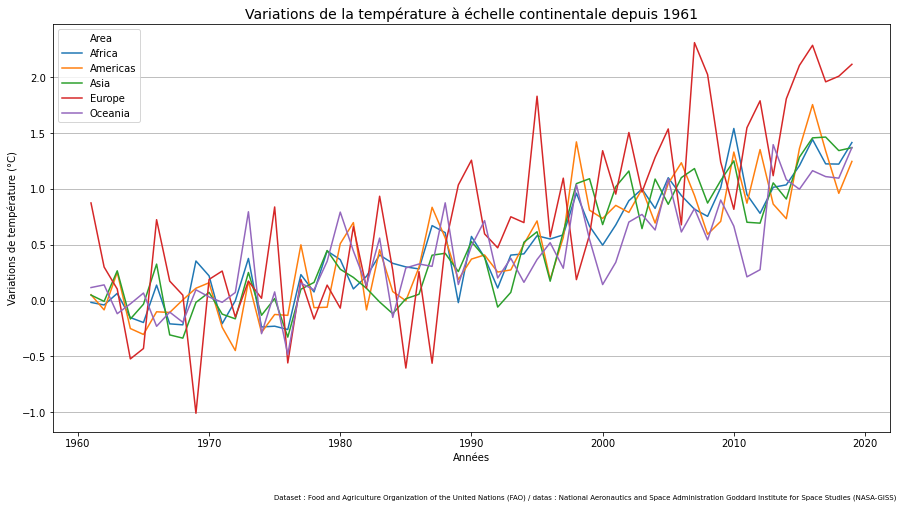

In [0]:
plt.figure(figsize=(15, 7.5))
_= sns.lineplot(temp_change_cont['Year'], temp_change_cont['Value'], data=temp_change_cont, hue='Area').grid(axis="y")

plt.title('Variations de la température à échelle continentale depuis 1961', fontsize=14)
plt.ylabel('Variations de température (°C)')
plt.xlabel('Années')

plt.figtext(0.33, 0, 
            'Dataset : Food and Agriculture Organization of the United Nations (FAO) / datas : National Aeronautics and Space Administration Goddard Institute for Space Studies (NASA-GISS)',
            fontsize=7)

plt.show()

In [0]:
"""
df_tempCont_mini = pd.concat(axis=1)
"""

In [0]:
"""#export du df pour données graphique
from google.colab import drive
drive.mount('drive')

df_snow_temp_HN.to_csv('NorthHem_snow_temp.csv')
!cp NorthHem_snow_temp.csv "drive/My Drive/"""